In [37]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model


model = read_sbml_model("../model/Rpom_05.xml")

https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http(s)://identifiers.org/collection/id' or'http(s)://identifiers.org/COLLECTION:id
https://identifiers.org/stem/ does not conform to 'http

In [39]:
# Using biocyc pipeline template file, load all reactions from both databases
template = pd.read_excel("../model_building/biocyc_update_pipeline/templates/template.xlsx", sheet_name="New reactions")
template

,Reaction ID,Reaction name 1,Reaction name 2,In DB1?,In DB2?,Gene-reaction rule 1,Gene-reaction rule 2,Stoichiometry 1,Stoichiometry 2,Bounds 1,Bounds 2,Metabolites not in Model,Metabolites without data,Has-Class-Metabolites,Polymerization,Is-Class,Has-Subclasses,Has-Instances,Issues,Recommendation
0,3.1.1.76-RXN,NaN,NaN,False,True,NaN,(SPO_RS06575),NaN,"{'Poly-3-hydroxyoctanoate__N-Name[c]': -1, 'WA...",NaN,"(0, 1000)","['Poly-3-hydroxyoctanoate__N-Name[c]', 'Poly-3...","['Poly-3-hydroxyoctanoate__N-Name[c]', 'Poly-3...",False,True,False,False,False,['Reaction has metabolites missing from the mo...,Do not add
1,RXN-12275,hydrogenase,NaN,True,False,(),NaN,"{'Reduced-hydrogenase-3[c]': -1, 'PROTON[c]': ...",NaN,"(0, 1000)",NaN,"['Reduced-hydrogenase-3[c]', 'Oxidized-hydroge...",[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
2,RXN1RHL-4,NaN,NaN,True,False,(SPO0240),NaN,"{'GLYCEROL[p]': -1, 'ATP[c]': -1, 'WATER[c]': ...",NaN,"(0, 1000)",NaN,[],[],False,False,False,False,False,['Reaction has metabolites in non-cytoplasm co...,Manual review
3,RXN-7904,NaN,NaN,True,True,(G1RHL-2048 or G1RHL-3161 or G1RHL-538),(SPO_RS09395 or SPO_RS10495 or SPO_RS12880 or ...,"{'Long-Chain-Fatty-Acids[c]': -1, 'CO-A[c]': -...","{'Long-Chain-Fatty-Acids[c]': -1, 'CO-A[c]': -...","(0, 1000)","(0, 1000)","['Long-Chain-Fatty-Acids[c]', 'Long-Chain-Acyl...",[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
4,RXN-8773,NaN,NaN,True,False,(),NaN,"{'XYLITOL[c]': -1, 'NADP[c]': -1, 'D-Xylopyran...",NaN,"(-1000, 1000)",NaN,['XYLITOL[c]'],[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,TRYPSYN-RXN,NaN,NaN,True,True,(),(SPO_RS04075 or SPO_RS04110),"{'INDOLE-3-GLYCEROL-P[c]': -1, 'SER[c]': -1, '...","{'INDOLE-3-GLYCEROL-P[c]': -1, 'SER[c]': -1, '...",NaN,"(0, 1000)",[],[],False,False,False,False,False,[],Add
1349,TRANS-RXN2K2G-15,NaN,NaN,False,True,NaN,(),NaN,"{'Pi[p]': -1, 'ATP[c]': -1, 'WATER[c]': -1, 'P...",NaN,"(0, 1000)",[],[],False,False,False,False,False,['Reaction has metabolites in non-cytoplasm co...,Manual review
1350,RXN-21432,NaN,NaN,False,True,NaN,(SPO_RS12700),NaN,"{'CPD-23334[c]': -1, 'WATER[c]': -1, 'N-ACETYL...",NaN,"(0, 1000)","['CPD-23334[c]', 'NACMUR[c]']",[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
1351,RXN-15682,NaN,NaN,False,True,NaN,(SPO_RS06685 or SPO_RS07195 or SPO_RS16160),NaN,"{'CPD-17047[c]': -1, 'WATER[c]': -2, 'CPD-1704...",NaN,NaN,"['CPD-17047[c]', 'CPD-17048[c]']",[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add


In [40]:
# Filter to reactions with no genes in either DB
gap_filled = template[
    (template["Gene-reaction rule 1"].isna() | (template["Gene-reaction rule 1"] == "()"))
    & (template["Gene-reaction rule 2"].isna() | (template["Gene-reaction rule 2"] == "()"))]
gap_filled

,Reaction ID,Reaction name 1,Reaction name 2,In DB1?,In DB2?,Gene-reaction rule 1,Gene-reaction rule 2,Stoichiometry 1,Stoichiometry 2,Bounds 1,Bounds 2,Metabolites not in Model,Metabolites without data,Has-Class-Metabolites,Polymerization,Is-Class,Has-Subclasses,Has-Instances,Issues,Recommendation
1,RXN-12275,hydrogenase,NaN,True,False,(),NaN,"{'Reduced-hydrogenase-3[c]': -1, 'PROTON[c]': ...",NaN,"(0, 1000)",NaN,"['Reduced-hydrogenase-3[c]', 'Oxidized-hydroge...",[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
4,RXN-8773,NaN,NaN,True,False,(),NaN,"{'XYLITOL[c]': -1, 'NADP[c]': -1, 'D-Xylopyran...",NaN,"(-1000, 1000)",NaN,['XYLITOL[c]'],[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
13,RXN-18707,NaN,NaN,False,True,NaN,(),NaN,"{'L-Cysteine-Desulfurase-persulfide[c]': -1, '...",NaN,"(0, 1000)","['L-Cysteine-Desulfurase-persulfide[c]', 'TusA...",[],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Manual review
21,RXN1YI0-19,NaN,NaN,False,True,NaN,(),NaN,"{'Oxidized-Cytochromes-C6[c]': -1, 'e<SUP>-</S...",NaN,"(0, 1000)","['Oxidized-Cytochromes-C6[c]', 'e<SUP>-</SUP>[...",['e<SUP>-</SUP>[c]'],True,False,False,False,False,['Reaction has metabolites missing from the mo...,Do not add
22,RXN1YI0-21,NaN,NaN,False,True,NaN,(),NaN,"{'OXYGEN-MOLECULE[p]': -1, 'PROTON[p]': -4, 'e...",NaN,"(0, 1000)",['e<SUP>-</SUP>[c]'],['e<SUP>-</SUP>[c]'],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Do not add
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,Transport-Reactions,Transport Reactions,Transport Reactions,True,True,(),(),{},{},NaN,NaN,[],[],False,False,True,True,True,"['No stoichiometry data', 'Reaction is a class...",Do not add
1340,RXN-13579,NaN,NaN,True,False,(),NaN,"{'NITRIC-OXIDE[p]': -2, 'PROTON[p]': -2, 'e<SU...",NaN,"(0, 1000)",NaN,['e<SUP>-</SUP>[c]'],['e<SUP>-</SUP>[c]'],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Do not add
1342,VALINE-PYRUVATE-AMINOTRANSFER-RXN,NaN,NaN,True,False,(),NaN,"{'PYRUVATE[c]': -1, 'VAL[c]': -1, 'L-ALPHA-ALA...",NaN,"(0, 1000)",NaN,[],[],False,False,False,False,False,[],Add
1344,RXN0-5259,NaN,NaN,True,True,(),(),"{'an electron-transfer quinone[c]': -1, 'PROTO...","{'an electron-transfer quinone[c]': -1, 'PROTO...","(0, 1000)","(0, 1000)","['an electron-transfer quinone[c]', 'e<SUP>-</...","['an electron-transfer quinone[c]', 'e<SUP>-</...",False,False,False,False,False,['Reaction has metabolites missing from the mo...,Do not add


In [41]:
# Filter to common-reactions between list and model
gap_filled_in_model = gap_filled[[rxn in model.reactions for rxn in gap_filled["Reaction ID"]]]
gap_filled_in_model

,Reaction ID,Reaction name 1,Reaction name 2,In DB1?,In DB2?,Gene-reaction rule 1,Gene-reaction rule 2,Stoichiometry 1,Stoichiometry 2,Bounds 1,Bounds 2,Metabolites not in Model,Metabolites without data,Has-Class-Metabolites,Polymerization,Is-Class,Has-Subclasses,Has-Instances,Issues,Recommendation
55,RXN-22316,NaN,NaN,False,True,NaN,(),NaN,"{'CPD-763[c]': -1, 'CPD-24319[c]': 1, 'PROTON[...",NaN,"(-1000, 1000)",['CPD-24319[c]'],[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
61,RXN-19319,NaN,NaN,True,True,(),(),"{'CPD-20852[c]': -1, 'WATER[c]': -1, 'CPD-2085...","{'CPD-20852[c]': -1, 'WATER[c]': -1, 'CPD-2085...","(0, 1000)","(0, 1000)","['CPD-20852[c]', 'CPD-20853[c]']",[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
71,GALACTURIDYLYLTRANS-RXN,NaN,NaN,False,True,NaN,(),NaN,"{'CPD-12575[c]': -1, 'GALACTOSE-1P[c]': -1, 'C...",NaN,"(0, 1000)","['GALACTOSE-1P[c]', 'CPD-14553[c]']",[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
103,RXN-19797,NaN,NaN,True,False,(),NaN,"{'CPD-21412[c]': -1, 'NAD[c]': -1, 'CPD-21413[...",NaN,"(0, 1000)",NaN,"['CPD-21412[c]', 'CPD-21413[c]']",[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
108,RXN-22735,NaN,NaN,False,True,NaN,(),NaN,"{'ATP[c]': -2, 'HCO3[c]': -1, 'AMMONIA[c]': -1...",NaN,"(0, 1000)",[],[],False,False,False,False,False,[],Add
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,RXN-22915,NaN,NaN,False,True,NaN,(),NaN,"{'CPD-25382[c]': -1, 'CYS[c]': -1, 'R-4-PHOSPH...",NaN,"(0, 1000)",['CPD-25382[c]'],[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
1319,RXN-22729,NaN,NaN,False,True,NaN,(),NaN,"{'CPD-9517[c]': -1, 'ANTHRANILATE[c]': 1, 'PYR...",NaN,"(0, 1000)",['CPD-9517[c]'],[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
1320,RXN0-7188,NaN,NaN,True,True,(),(),"{'MET[c]': -1, 'HYDROGEN-PEROXIDE[c]': -1, 'CP...","{'MET[c]': -1, 'HYDROGEN-PEROXIDE[c]': -1, 'CP...","(0, 1000)","(0, 1000)",['CPD-8990[c]'],[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add
1322,RXN-19310,NaN,NaN,True,True,(),(),"{'CPD-20856[c]': -1, 'WATER[c]': -1, 'CPD-1718...","{'CPD-20856[c]': -1, 'WATER[c]': -1, 'CPD-1718...","(0, 1000)","(0, 1000)","['CPD-20856[c]', 'CPD-17189[c]']",[],False,False,False,False,False,['Reaction has metabolites missing from the mo...,Add


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 125.]),
 array([0.57700923, 0.57704622, 0.5770832 , 0.57712019, 0.57715717,
        0.57719416, 0.57723115, 0.57726813, 0.57730512, 0.5773421 ,
        0.57737909, 0.57741607, 0.57745306, 0.57749005, 0.57752703,
        0.57756402, 0.577601  , 0.57763799, 0.57767497, 0.57771196,
        0.57774895]),
 <BarContainer object of 20 artists>)

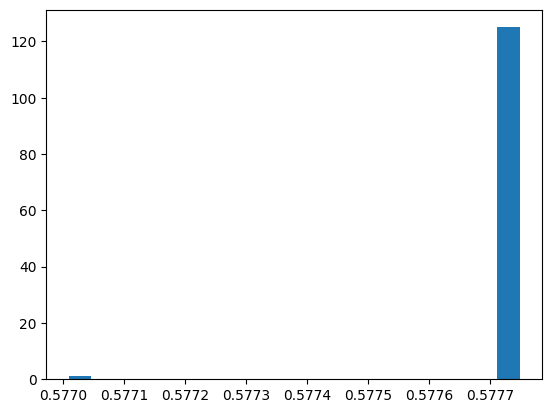

In [44]:
# Rank by growth impact of deletion on glucose growth
with model:
    model.reactions.get_by_id("EX_glc").bounds = (-5.44, 0)

    baseline_mu = model.optimize()

    growth_rates = {}
    for rxn in gap_filled_in_model["Reaction ID"]:
        with model:
            model.reactions.get_by_id(rxn).bounds = (0.,0.)
            growth_rates[rxn] = model.optimize().objective_value


fig, ax = plt.subplots()
ax.hist(growth_rates.values(), bins=20)

In [58]:
result = gap_filled_in_model.copy()
result = result.merge(pd.DataFrame([{"ID" : rxn, "mu" : mu} for rxn, mu in growth_rates.items()]),
             left_on="Reaction ID", right_on="ID")
result["Flux"] = [baseline_mu[rxn] for rxn in result["Reaction ID"]]
result["Fold-Change"] = result["mu"] / baseline_mu.objective_value
result.sort_values("Fold-Change")

,Reaction ID,Reaction name 1,Reaction name 2,In DB1?,In DB2?,Gene-reaction rule 1,Gene-reaction rule 2,Stoichiometry 1,Stoichiometry 2,Bounds 1,...,Polymerization,Is-Class,Has-Subclasses,Has-Instances,Issues,Recommendation,ID,mu,Flux,Fold-Change
109,RXN-7745,NaN,NaN,False,True,NaN,(),NaN,"{'CPD-7066[c]': -1, 'NAD[c]': -1, '2-OXOBUTANO...",NaN,...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,RXN-7745,0.577009,0.139479,0.99872
110,RXN-16691,NaN,NaN,True,True,(),(),"{'CPD-17969[c]': -1, 'CPD-18809[c]': 1, 'PROTO...","{'CPD-17969[c]': -1, 'CPD-18809[c]': 1, 'PROTO...","(0, 1000)",...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,RXN-16691,0.577749,0.000000,1.00000
90,BENZALDEHYDE-DEHYDROGENASE-NADP+-RXN,NaN,NaN,False,True,NaN,(),NaN,"{'BENZALDEHYDE[c]': -1, 'WATER[c]': -1, 'NADP[...",NaN,...,False,False,False,False,[],Add,BENZALDEHYDE-DEHYDROGENASE-NADP+-RXN,0.577749,0.000000,1.00000
89,2.1.1.21-RXN,NaN,NaN,True,False,(),NaN,"{'METHYLAMINE[c]': -1, 'GLT[c]': -1, 'CPD-404[...",NaN,NaN,...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,2.1.1.21-RXN,0.577749,0.000000,1.00000
88,RXN-19323,NaN,NaN,True,False,(),NaN,"{'CPD-13940[c]': -1, 'WATER[c]': -1, 'CPD-2084...",NaN,"(0, 1000)",...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,RXN-19323,0.577749,0.000000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,R581-RXN,(Aceto)phenylmercury lyase,NaN,True,False,(),NaN,"{'CPD-901[c]': -1, 'PROTON[c]': -1, 'HG+2[c]':...",NaN,"(0, 1000)",...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,R581-RXN,0.577749,0.000000,1.00000
34,RXN-11179,NaN,NaN,True,True,(),(),"{'CPD-12136[c]': -1, 'CPD-12137[c]': 1, 'WATER...","{'CPD-12136[c]': -1, 'CPD-12137[c]': 1, 'WATER...","(0, 1000)",...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,RXN-11179,0.577749,0.000000,1.00000
33,L-LYSINE-AMINOTRANSFERASE-RXN,NaN,NaN,True,False,(),NaN,"{'2-KETOGLUTARATE[c]': -1, 'LYS[c]': -1, 'GLT[...",NaN,"(-1000, 1000)",...,False,False,False,False,[],Add,L-LYSINE-AMINOTRANSFERASE-RXN,0.577749,0.000000,1.00000
46,RXN-22643,NaN,NaN,False,True,NaN,(),NaN,"{'GLUTATHIONE[c]': -1, 'FUM[c]': -1, 'CPD-2487...",NaN,...,False,False,False,False,['Reaction has metabolites missing from the mo...,Add,RXN-22643,0.577749,0.000000,1.00000


In [ ]:
model.reactions.get_by_id("RXN-7745")

Reaction identifier,RXN-7745
Name,
Memory address,0x7c861fbbb260
Stoichiometry,"CPD-7066[c] + NAD[c] --> 2-OXOBUTANOATE[c] + CARBON-DIOXIDE[c] + NADH[c] (2R,3S)-3-methylmalate + NAD+ --> 2-oxobutanoate + CO2 + NADH"
GPR,
Lower bound,0.0
Upper bound,1000.0


In [57]:
model.reactions.get_by_id("RXN-16691")

Reaction identifier,RXN-16691
Name,
Memory address,0x7c861fbba7e0
Stoichiometry,"CPD-17969[c] --> CPD-18809[c] + PROTON[c] + UNDECAPRENYL-DIPHOSPHATE[c] a nascent peptidoglycan with (L-alanyl-γ-D-glutamyl-meso-2,6-diaminopimeloyl-glycine) tetrapeptide --> a mature peptidoglycan with..."
GPR,
Lower bound,0.0
Upper bound,1000.0


In [59]:
model.reactions.get_by_id("RXN-16062")

KeyError: 'RXN-16062'